In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')
data_df.head()

,training_set,tot_ct,ex_ct,y,x
0,True,1588,66,-4.567814,ACGGUCCAU
1,True,1533,118,-3.688265,AUUGCCAGG
2,True,1459,399,-1.867896,ACAGCGGUA
3,True,1414,246,-2.518219,AACGCCAGG
4,True,1412,60,-4.533808,ACGGCUUGG


In [3]:
# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 24,411
testing N: 6,079


In [4]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='pairwise', 
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [5]:
# Set training data
model.set_data(x=train_df['x'],
               y=train_df['y'],
               shuffle=True)

N = 24,411 observations set as training data.
Data shuffled.
Time to set data: 0.392 sec.


In [6]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=1000,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=True)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has    24411 rows  and       36 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.562e+02  5.834e+03   1.0e+00  2.4e-01
     1 -1.37173e-03  1.424e+02  1.972e+03   9.1e-01  1.5e-01  9.0e+01  1.0e+00
     2  5.81716e-04  1.414e+02  1.509e+03   9.0e-01  7.4e-02  1.4e+02  1.1e+00
     3 -8.08500e-04  1.405e+02  7.449e+01   9.0e-01  1.7e-03  3.1e+02  1.7e+00
     4 -1.51587e-03  1.405e+02  5.312e+00   9.0e-01  1.2e-04  3.2e+02  2.0e+00
     5 -1.63394e-03  1.405e+02  2.297e+00   9.0e-01  5.0e-05  3.3e+02  2.4e+00
     6 -1.62869e-03  1.405e+02  2.245e+00   9.0e-01  4.8e-05  3.3e+02  1.0e+01
     7 -1.70403e-03  1.405e+02  2.232e+00   9.0e-01  4.7e-05  3.4e+02  6.6e+01
     8 -6.07057e-03  1.405e+02  1.181e+00   9.0e-01  2.4e-05  3.5e+02  2.0

98/98 [==============================] - 0s 3ms/step - loss: 157.0796 - I_like: 0.2555 - val_loss: 157.2374 - val_I_like: 0.2445
Epoch 47/1000
98/98 [==============================] - 0s 3ms/step - loss: 156.8979 - I_like: 0.2578 - val_loss: 157.4021 - val_I_like: 0.2429
Epoch 48/1000
98/98 [==============================] - 0s 4ms/step - loss: 156.7102 - I_like: 0.2594 - val_loss: 156.9973 - val_I_like: 0.2468
Epoch 49/1000
98/98 [==============================] - 0s 3ms/step - loss: 156.6996 - I_like: 0.2606 - val_loss: 156.8892 - val_I_like: 0.2479
Epoch 50/1000
98/98 [==============================] - 0s 3ms/step - loss: 156.4554 - I_like: 0.2617 - val_loss: 157.0844 - val_I_like: 0.2456
Epoch 51/1000
98/98 [==============================] - 0s 4ms/step - loss: 156.2657 - I_like: 0.2623 - val_loss: 156.5224 - val_I_like: 0.2506
Epoch 52/1000
98/98 [==============================] - 0s 5ms/step - loss: 156.2935 - I_like: 0.2632 - val_loss: 156.8504 - val_I_like: 0.2492
Epoch 53/1000

98/98 [==============================] - 0s 4ms/step - loss: 144.4369 - I_like: 0.3550 - val_loss: 151.2934 - val_I_like: 0.2988
Epoch 104/1000
98/98 [==============================] - 0s 3ms/step - loss: 144.3071 - I_like: 0.3550 - val_loss: 148.0649 - val_I_like: 0.3213
Epoch 105/1000
98/98 [==============================] - 0s 3ms/step - loss: 143.8053 - I_like: 0.3588 - val_loss: 148.2141 - val_I_like: 0.3203
Epoch 106/1000
98/98 [==============================] - 0s 3ms/step - loss: 143.6213 - I_like: 0.3599 - val_loss: 148.0726 - val_I_like: 0.3209
Epoch 107/1000
98/98 [==============================] - 0s 3ms/step - loss: 143.9418 - I_like: 0.3580 - val_loss: 148.1631 - val_I_like: 0.3214
Epoch 108/1000
98/98 [==============================] - 0s 3ms/step - loss: 143.6048 - I_like: 0.3602 - val_loss: 149.9409 - val_I_like: 0.3084
Epoch 109/1000
98/98 [==============================] - 0s 3ms/step - loss: 143.6716 - I_like: 0.3610 - val_loss: 148.5252 - val_I_like: 0.3187
Epoch 1

Epoch 160/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.4633 - I_like: 0.3682 - val_loss: 145.3398 - val_I_like: 0.3416
Epoch 161/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.3964 - I_like: 0.3684 - val_loss: 147.1121 - val_I_like: 0.3306
Epoch 162/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.3344 - I_like: 0.3693 - val_loss: 145.2440 - val_I_like: 0.3430
Epoch 163/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.4592 - I_like: 0.3688 - val_loss: 146.2848 - val_I_like: 0.3354
Epoch 164/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.4112 - I_like: 0.3697 - val_loss: 146.5466 - val_I_like: 0.3311
Epoch 165/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.3552 - I_like: 0.3697 - val_loss: 145.8235 - val_I_like: 0.3387
Epoch 166/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.2480 - I_like: 0.3717 - val_loss: 145.7016 - val_I_like:

Epoch 217/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.1970 - I_like: 0.3712 - val_loss: 145.5878 - val_I_like: 0.3385
Epoch 218/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.2236 - I_like: 0.3713 - val_loss: 145.2151 - val_I_like: 0.3426
Epoch 219/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.4003 - I_like: 0.3711 - val_loss: 146.1900 - val_I_like: 0.3367
Epoch 220/1000
98/98 [==============================] - 0s 4ms/step - loss: 142.2136 - I_like: 0.3719 - val_loss: 145.7796 - val_I_like: 0.3387
Epoch 221/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.1779 - I_like: 0.3707 - val_loss: 145.2758 - val_I_like: 0.3424
Epoch 222/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.4671 - I_like: 0.3696 - val_loss: 145.6820 - val_I_like: 0.3395
Epoch 223/1000
98/98 [==============================] - 0s 3ms/step - loss: 142.1883 - I_like: 0.3711 - val_loss: 146.1054 - val_I_like:

In [7]:
# Save model
model.save('mpsa_ge_pairwise')

Model saved to these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [8]:
# Load model
model = mavenn.load('mpsa_ge_pairwise')

Model loaded from these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [9]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_like_test: 0.342 +- 0.025 bits
I_pred_test: 0.386 +- 0.014 bits


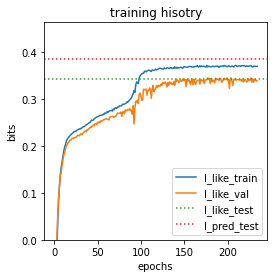

In [10]:
# Show training history
print('On test data:')

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

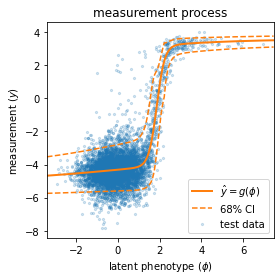

In [11]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

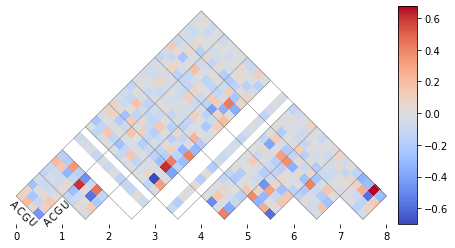

In [12]:
# Plot pairwise parameters
theta = model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                        alphabet=theta['alphabet'],
                        ax=ax);

In [13]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,training_set,yhat,phi,y,x
0,True,-4.282387,0.229698,-4.075227,AGCGCAGGU
1,True,-4.476665,-1.442184,-4.674128,UCGGCCUAA
2,True,-4.333871,-0.201852,-4.024881,GUCGCACCC
3,True,-4.500225,-1.655577,-4.432846,UUAGCAGAA
4,True,-4.469442,-1.377505,-4.291616,UAUGUUUGG
